In [86]:
## Importing all the necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier

In [87]:
# Loading the dataset to do the manuplation
d = pd.read_csv("breast-cancer-wisconsin.csv", header = None)
# Seperating the data set into data and response variable
x=d.iloc[:,1:10]
# Response Variable
y=d.iloc[:,-1]
# Normalizing the response variable in terms of 0 and 1
y2=(y-2)/2
# Splitting the test  and train data sets of bot data and response variables
x_train, x_test, y_train, y_test = train_test_split(x, y2, train_size=0.587,shuffle=False)

## A) Logistic Regression 

In [88]:
ld = LogisticRegression()
ld.fit(x_train, y_train)
predictions = ld.predict(x_test)
error=np.mean(predictions != y_test)
print("Misclassification error using logistic regression=",error)
c=confusion_matrix(y_test, predictions)
print("Cost using logistic regresion:",(c[0][1]+100*c[1][0])/6916)
r=0
## probability parameter for the correctly classified instances
p=ld.predict_proba(x_test)
for i in range(len(predictions)):
    r=r+((p[i][1]-0.5)**2)
p1=r/len(predictions)
rms=np.sqrt(p1)
print("Rms value using logistic regression:",rms)

Misclassification error using logistic regression= 0.01060070671378092
Cost using logistic regresion: 0.014748409485251591
Rms value using logistic regression: 0.47752614022418116


##  B) KNNeighbour Classification

Misclassification using Knn neighbor
Number of neighbors= 1
Misclassification Rate  =  0.0176678445229682
Cost using Knn: 0.015037593984962405
Number of neighbors= 2
Misclassification Rate  =  0.024734982332155476
Cost using Knn: 0.07258530942741469
Number of neighbors= 3
Misclassification Rate  =  0.014134275618374558
Cost using Knn: 0.000578368999421631
Number of neighbors= 4
Misclassification Rate  =  0.0176678445229682
Cost using Knn: 0.029352226720647773
Number of neighbors= 5
Misclassification Rate  =  0.0176678445229682
Cost using Knn: 0.015037593984962405
Number of neighbors= 6
Misclassification Rate  =  0.01060070671378092
Cost using Knn: 0.014748409485251591
Number of neighbors= 7
Misclassification Rate  =  0.014134275618374558
Cost using Knn: 0.014893001735106999
Number of neighbors= 8
Misclassification Rate  =  0.01060070671378092
Cost using Knn: 0.014748409485251591
Number of neighbors= 9
Misclassification Rate  =  0.01060070671378092
Cost using Knn: 0.014748409485251591
N

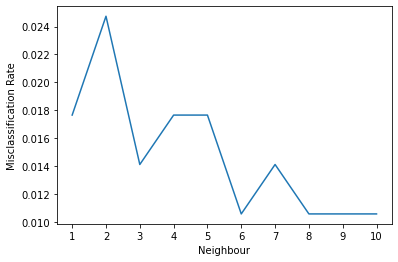

In [89]:
m=[]
n=[1,2,3,4,5,6,7,8,9,10]
print("Misclassification using Knn neighbor")
for i in range(len(n)):
    k = KNeighborsClassifier(n_neighbors=n[i])
    k.fit(x_train,y_train)
    pred_i = k.predict(x_test)
    print ("Number of neighbors=",n[i])
    print ("Misclassification Rate  = ",np.mean(pred_i!=y_test))
    m.append(np.mean(pred_i!=y_test))
    co=confusion_matrix(y_test, pred_i)
    print("Cost using Knn:",(co[0][1]+100*co[1][0])/6916)
plt.xticks(n) 
plt.plot(n,m)
plt.xlabel("Neighbour")
plt.ylabel("Misclassification Rate")
plt.show()

## C)Linear Discriminant Analysis 

In [90]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
predictions = lda.predict(x_test)
error=np.mean(predictions != y_test)
print("Misclassification error using LDA=",error)
co=confusion_matrix(y_test, predictions)
print("Cost using LDA:",(co[0][1]+100*co[1][0])/6916)

Misclassification error using LDA= 0.0176678445229682
Cost using LDA: 0.05798149219201851


## D) Support Vector Machine

## Linear Kernel 

In [91]:
sv = svm.SVC(kernel='linear',probability=True, random_state = 42)
sv.fit(x_train, y_train)
predictionsl = sv.predict(x_test)
error=np.mean(predictionsl != y_test)
print("Misclassification error using SVM linear Kernel=",error)
pr=sv.predict_proba(x_test)
r=0
p=sv.predict_proba(x_test)
for i in range(len(predictions)):
    r=r+((p[i][1]-0.5)**2)
p1=r/len(predictions)
rms=np.sqrt(p1)
print("RMS value using SVM linear kernel=",rms)
co=confusion_matrix(y_test, predictionsl)
print("Cost using SVM linear kernel:",(co[0][1]+100*co[1][0])/6916)

Misclassification error using SVM linear Kernel= 0.014134275618374558
RMS value using SVM linear kernel= 0.4641658523190452
Cost using SVM linear kernel: 0.014893001735106999



## Poly Kernel 

In [92]:
k=[2,3,4,5]
for i in range(len(k)):
    print("Degree",k[i])
    sv = svm.SVC(kernel='poly', degree=k[i], probability=True, random_state =42)
    sv.fit(x_train, y_train)
    predictions = sv.predict(x_test)
    error=np.mean(predictions != y_test)
    print("Misclassification error=",error)
    pr=sv.predict_proba(x_test)
    r=0
    p=sv.predict_proba(x_test)
    for i in range(len(predictions)):
        r=r+((p[i][1]-0.5)**2)
    p1=r/len(predictions)
    rms=np.sqrt(p1)
    print("RMS value using SVM poly kernel=",rms)
    co=confusion_matrix(y_test, predictions)
    cost1 =co[0][1]
    cost2 = co[1][0]*100
    Total=(cost1+cost2)/6916
    print("Cost using SVM poly kernel=",Total)

Degree 2
Misclassification error= 0.01060070671378092
RMS value using SVM poly kernel= 0.46236330869006026
Cost using SVM poly kernel= 0.014748409485251591
Degree 3
Misclassification error= 0.01060070671378092
RMS value using SVM poly kernel= 0.44774022079133446
Cost using SVM poly kernel= 0.029063042220936957
Degree 4
Misclassification error= 0.0353356890459364
RMS value using SVM poly kernel= 0.41153076105586495
Cost using SVM poly kernel= 0.10164835164835165
Degree 5
Misclassification error= 0.0353356890459364
RMS value using SVM poly kernel= 0.3707110551523894
Cost using SVM poly kernel= 0.10164835164835165


## RBF Kernel 

In [93]:
sv = svm.SVC(kernel='rbf',probability=True, random_state = 42)
sv.fit(x_train, y_train)
predictions = sv.predict(x_test)
error=np.mean(predictions != y_test)
print("Misclassification error using SVM RBF Kernel=",error)
r=0
p=sv.predict_proba(x_test)
for i in range(len(predictions)):
    r=r+((p[i][1]-0.5)**2)
p1=r/len(predictions)
rms=np.sqrt(p1)
print("RMS value using SVM RBF Kernel=",rms)
co=confusion_matrix(y_test, predictions)
print("Cost using SVM RBF kernel:",(co[0][1]+100*co[1][0])/6916)

Misclassification error using SVM RBF Kernel= 0.0176678445229682
RMS value using SVM RBF Kernel= 0.47098612438805415
Cost using SVM RBF kernel: 0.015037593984962405


## Sigmoid Kernel 

In [94]:
sv = svm.SVC(kernel='sigmoid',probability=True, random_state = 42)
sv.fit(x_train, y_train)
predictions = sv.predict(x_test)
error=np.mean(predictions != y_test)
print("Misclassification error using SVM Sigmoid Kernel =",error)
r=0
pr=sv.predict_proba(x_test)
r=0
p=sv.predict_proba(x_test)
for i in range(len(predictions)):
    r=r+((p[i][1]-0.5)**2)
p1=r/len(predictions)
rms=np.sqrt(p1)
print("RMS value using SVM Sigmoid Kernel=",rms)
co=confusion_matrix(y_test, predictions)
print("Cost using SVM Sigmoid kernel:",(co[0][1]+100*co[1][0])/6916)

Misclassification error using SVM Sigmoid Kernel = 0.8374558303886925
RMS value using SVM Sigmoid Kernel= 0.46232613732590283
Cost using SVM Sigmoid kernel: 0.9933487565066512


## Decision Tree Classifier with several depths

depth= 3
Misclassification Rate using Decision tree is:  0.0353356890459364
Cost using SVM RBF kernel: 0.10164835164835165
depth= 4
Misclassification Rate using Decision tree is:  0.02120141342756184
Cost using SVM RBF kernel: 0.043811451706188546
depth= 5
Misclassification Rate using Decision tree is:  0.05653710247349823
Cost using SVM RBF kernel: 0.1884037015615963
depth= 6
Misclassification Rate using Decision tree is:  0.045936395759717315
Cost using SVM RBF kernel: 0.1307113938692886
depth= 7
Misclassification Rate using Decision tree is:  0.045936395759717315
Cost using SVM RBF kernel: 0.14502602660497396
depth= 8
Misclassification Rate using Decision tree is:  0.053003533568904596
Cost using SVM RBF kernel: 0.1453152111046848
depth= 9
Misclassification Rate using Decision tree is:  0.053003533568904596
Cost using SVM RBF kernel: 0.15962984384037016
depth= 10
Misclassification Rate using Decision tree is:  0.045936395759717315
Cost using SVM RBF kernel: 0.1307113938692886


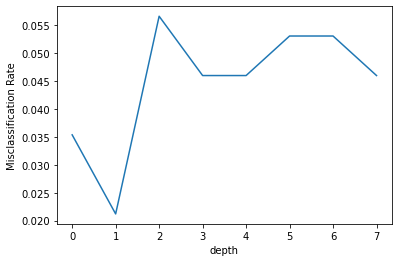

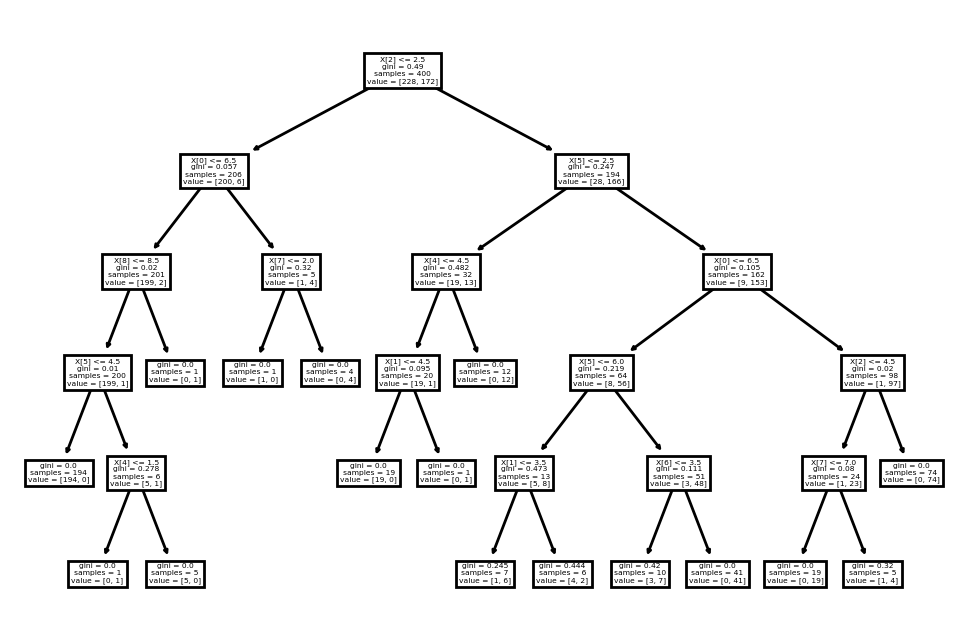

In [95]:
from sklearn import tree
depth=[3,4,5,6,7,8,9,10]
msrate=[]
for i in range (8):
    print("depth=",depth[i])
    D = DecisionTreeClassifier(max_depth=depth[i])
    D.fit(x_train, y_train)
    predictionsd= D.predict(x_test)
    msd=np.mean(predictionsd!=y_test)
    msrate.append(msd)
    print("Misclassification Rate using Decision tree is: ",msd)
    co=confusion_matrix(y_test, predictionsd)
    print("Cost using SVM RBF kernel:",(co[0][1]+100*co[1][0])/6916)
plt.plot(msrate)
plt.ylabel("Misclassification Rate")
plt.xlabel("depth")
plt.show()
D5 = DecisionTreeClassifier(max_depth=5)
D5.fit(x_train, y_train)
plt.figure(dpi=200)
tree.plot_tree(D5)
plt.show()

## F)Ada Boost Classifier

In [96]:
weaklearners=[100,200,300,400,500]
for i in range (5):
    print("Weak Learners=",weaklearners[i])
    Aboost= AdaBoostClassifier(n_estimators=weaklearners[i])
    Aboost.fit(x_train, y_train)
    predictionsab= Aboost.predict(x_test)
    msab=np.mean(predictionsab!=y_test)
    print("Misclassification Rate using Adaboost classifier is: ",msab)
    co=confusion_matrix(y_test, predictionsab)
    print("Cost using ADA BOOST kernel:",(co[0][1]+100*co[1][0])/6916)

Weak Learners= 100
Misclassification Rate using Adaboost classifier is:  0.038869257950530034
Cost using ADA BOOST kernel: 0.10179294389820706
Weak Learners= 200
Misclassification Rate using Adaboost classifier is:  0.038869257950530034
Cost using ADA BOOST kernel: 0.10179294389820706
Weak Learners= 300
Misclassification Rate using Adaboost classifier is:  0.04946996466431095
Cost using ADA BOOST kernel: 0.14517061885482938
Weak Learners= 400
Misclassification Rate using Adaboost classifier is:  0.038869257950530034
Cost using ADA BOOST kernel: 0.10179294389820706
Weak Learners= 500
Misclassification Rate using Adaboost classifier is:  0.04240282685512368
Cost using ADA BOOST kernel: 0.11625216888374783


## F) Random Forest Classification

In [97]:
weaklearners=[100,200,300,400,500]
for i in range (5):
    print("Weak Learners=",weaklearners[i])
    rf= RandomForestClassifier(n_estimators=weaklearners[i])
    rf.fit(x_train, y_train)
    predictionsrf= rf.predict(x_test)
    msrf=np.mean(predictionsrf!=y_test)
    print("Misclassification Rate using random forest classifier is: ",msrf)
    co=confusion_matrix(y_test, predictions)
    print("Cost using Random forest classifier:",(co[0][1]+100*co[1][0])/6916)

Weak Learners= 100
Misclassification Rate using random forest classifier is:  0.014134275618374558
Cost using Random forest classifier: 0.9933487565066512
Weak Learners= 200
Misclassification Rate using random forest classifier is:  0.01060070671378092
Cost using Random forest classifier: 0.9933487565066512
Weak Learners= 300
Misclassification Rate using random forest classifier is:  0.014134275618374558
Cost using Random forest classifier: 0.9933487565066512
Weak Learners= 400
Misclassification Rate using random forest classifier is:  0.0176678445229682
Cost using Random forest classifier: 0.9933487565066512
Weak Learners= 500
Misclassification Rate using random forest classifier is:  0.0176678445229682
Cost using Random forest classifier: 0.9933487565066512


## F) XG Boost

In [98]:
weaklearners=[100,200,300,400,500]
for i in range (5):
    print("Weak Learners=",weaklearners[i])
    xg= XGBClassifier(n_estimators=weaklearners[i],eval_metric='mlogloss',use_label_encoder=False)
    xg.fit(x_train, y_train)
    predictionsxg= xg.predict(x_test)
    msxg=np.mean(predictionsxg!=y_test)
    print("Misclassification Rate using Xgboost classifier is: ",msxg)
    co=confusion_matrix(y_test, predictionsxg)
    print("Cost using Xgboost classifier:",(co[0][1]+100*co[1][0])/6916)

Weak Learners= 100
Misclassification Rate using Xgboost classifier is:  0.02120141342756184
Cost using Xgboost classifier: 0.015182186234817813
Weak Learners= 200
Misclassification Rate using Xgboost classifier is:  0.02120141342756184
Cost using Xgboost classifier: 0.015182186234817813
Weak Learners= 300
Misclassification Rate using Xgboost classifier is:  0.02120141342756184
Cost using Xgboost classifier: 0.015182186234817813
Weak Learners= 400
Misclassification Rate using Xgboost classifier is:  0.02120141342756184
Cost using Xgboost classifier: 0.015182186234817813
Weak Learners= 500
Misclassification Rate using Xgboost classifier is:  0.02120141342756184
Cost using Xgboost classifier: 0.015182186234817813


## G) Comparison between the all Classifiers in the terms of Misclassification and Cost
 Misclassification rate:
 
 When Misclassification rate is high it is bad classifier
 
 When Misclassification rate is low it is good classifier
 
 Misclassification rate of 
 
                           Logistic Regression
 
                           kNN nearest neighbors  with the number of neighbours:6,8,9 and 10
                           
                           SVM using poly kernel for degree 2 and 3 
                           
 The above stated classifiers has the lowest misclassification rate as  0.106 
 
 The highest misclassification rate as 0.8374558303886925 - Sigmoid
 
 Weighted Cost:
 
 When Weighted Cost is high it is bad classifier
 
 When Weighted Cost is low  it is good classifier
 
 Weight Cost of KNN when number of neighbour 3 is 0.0005 is the best classifier
 
 Weight Cost of Sigmoid is 0.99 is the bad classifier

With the keen comparision of the Cost and Misclassification of the Classifiers, We are able to conclude that, Sigmoid is the bad classifier and the KNneighbour with the number of neighbours 3 is the good classifier